In [106]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('Survived.csv')



In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [109]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

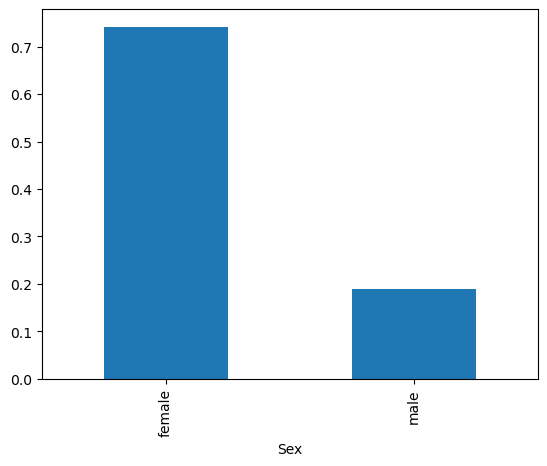

In [110]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

In [111]:
pd.pivot_table(df,index='Sex',columns='Pclass',values='Age')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [112]:
df.loc[(df['Pclass']==1)&(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = 34.6
df.loc[(df['Pclass']==1)&(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = 41.3
df.loc[(df['Pclass']==2)&(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = 28.7
df.loc[(df['Pclass']==2)&(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = 30.7
df.loc[(df['Pclass']==3)&(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = 21.7
df.loc[(df['Pclass']==3)&(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = 26.5

In [113]:
male = pd.get_dummies(df['Sex'],drop_first =True,dtype ='uint8')
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [114]:
col = [ 'Pclass',  'Age', 'SibSp', 'Parch','Fare']
x = df[col]
t = df['Survived']

x_temp = pd.concat([x,male],axis=1)
x_temp.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [115]:


def learn(x, t, depth = 3):
    x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0,)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight='balanced')
    model.fit(x_train, y_train)
    
    score = model.score(X =x_train,y = y_train)
    score2 = model.score(X =x_test,y = y_test)
    return round(score, 3) , round(score2 ,3) ,model


for j in range(1,15):
    train_score, test_score, model = learn(x,t, depth = j)
    sentence = '訓練{}'
    sentence2 = 'テスト{}'
    total_sentence= '深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,train_score,test_score))
    




深さ1:訓練0.659テスト0.704
深さ2:訓練0.699テスト0.732
深さ3:訓練0.666テスト0.642
深さ4:訓練0.723テスト0.709
深さ5:訓練0.76テスト0.698
深さ6:訓練0.798テスト0.721
深さ7:訓練0.809テスト0.659
深さ8:訓練0.847テスト0.726
深さ9:訓練0.886テスト0.682
深さ10:訓練0.912テスト0.648
深さ11:訓練0.93テスト0.659
深さ12:訓練0.952テスト0.659
深さ13:訓練0.962テスト0.665
深さ14:訓練0.969テスト0.67


In [116]:
for j in range(1,6):
    s1,s2 ,m = learn(x_temp,t,depth =j)
    print(f'{j},train{s1},test{s2}')
    

1,train0.787,test0.788
2,train0.792,test0.782
3,train0.834,test0.821
4,train0.844,test0.827
5,train0.85,test0.816


In [117]:
s1,s2 ,m = learn(x_temp,t,depth =4)
print(f'train{s1},test{s2}')

import pickle
with open('Survived_sex_Pclass_mean.pkl', 'wb') as f:
    pickle.dump(model,f)

train0.844,test0.827


[Text(0.45689655172413796, 0.9, 'male <= 0.5\ngini = 0.5\nsamples = 712\nvalue = [356.0, 356.0]\nclass = y[1]'),
 Text(0.1896551724137931, 0.7, 'Pclass <= 2.5\ngini = 0.289\nsamples = 247\nvalue = [51.089, 239.941]\nclass = y[1]'),
 Text(0.06896551724137931, 0.5, 'Age <= 2.5\ngini = 0.074\nsamples = 132\nvalue = [6.487, 161.7]\nclass = y[1]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0.811, 0.0]\nclass = y[0]'),
 Text(0.10344827586206896, 0.3, 'Fare <= 28.856\ngini = 0.066\nsamples = 131\nvalue = [5.677, 161.7]\nclass = y[1]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.136\nsamples = 53\nvalue = [4.866, 61.289]\nclass = y[1]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.016\nsamples = 78\nvalue = [0.811, 100.41]\nclass = y[1]'),
 Text(0.3103448275862069, 0.5, 'Fare <= 23.35\ngini = 0.463\nsamples = 115\nvalue = [44.601, 78.242]\nclass = y[1]'),
 Text(0.2413793103448276, 0.3, 'Age <= 27.5\ngini = 0.4\nsamples = 92\nvalue = [28.383, 74.33]\nclass = y[1]'),
 Text

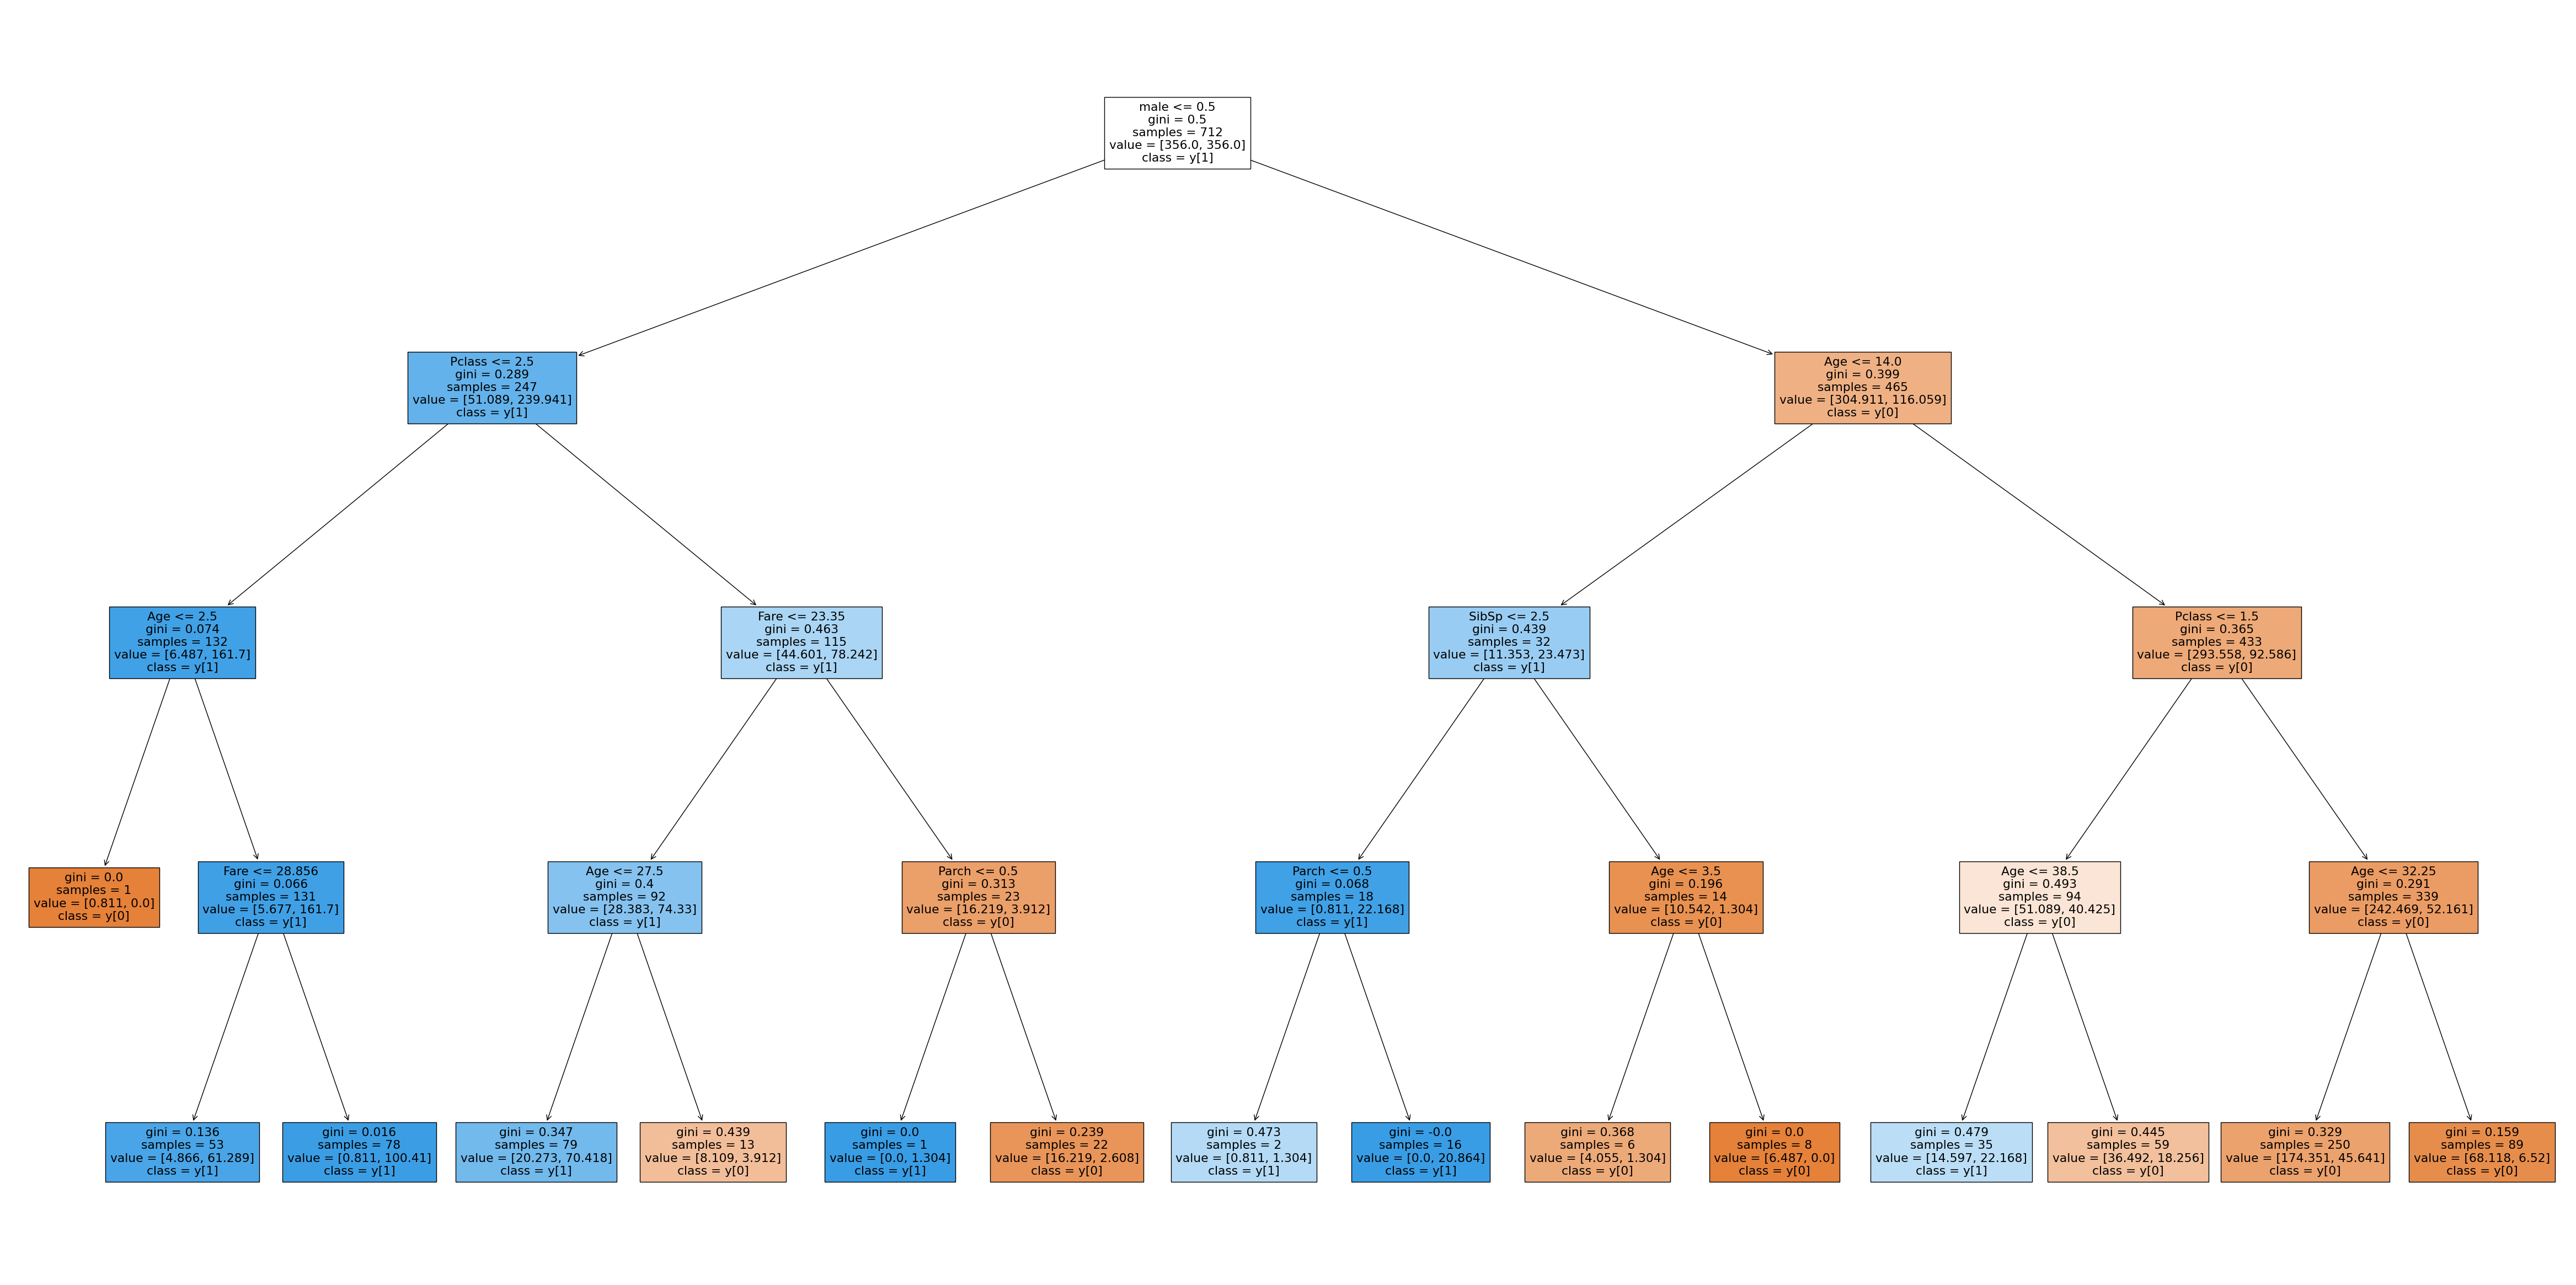

In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(60,30))

plot_tree(m, feature_names=x_temp.columns, class_names=True,filled=True)

In [120]:
plt.show()
plt.savefig("tree.pdf")



<Figure size 640x480 with 0 Axes>